<a href="https://colab.research.google.com/github/Truclc79/machine-learning-in-action/blob/master/DOAN_DI_22C11050_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression Models

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [5]:
import datetime as dt
df_all = pd.read_csv("/content/drive/MyDrive/9. DA - BI/DOAN/weather_vi.csv")
#label_encoder = LabelEncoder()
#encoded_tinhthanh = label_encoder.fit_transform(df['Tinhthanh'])
#df['Tinhthanh'] = encoded_tinhthanh
df_all['Month'] =pd.to_datetime(df_all['date'])
df_all['Month'] = df_all['Month'].dt.to_period('M')

df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype    
---  ------       --------------   -----    
 0   Tinhthanh    181960 non-null  object   
 1   Nhietdo_max  181960 non-null  int64    
 2   Nhietdo_min  181960 non-null  int64    
 3   Tocdo_gio    181960 non-null  int64    
 4   Huong_gio    181960 non-null  object   
 5   Luong_mua    181960 non-null  float64  
 6   Doam         181960 non-null  int64    
 7   Luong_may    181960 non-null  int64    
 8   Apsuat       181960 non-null  int64    
 9   date         181960 non-null  object   
 10  Month        181960 non-null  period[M]
dtypes: float64(1), int64(6), object(3), period[M](1)
memory usage: 15.3+ MB


# GIÓ MÙA TÂY NAM & LƯỢNG MƯA TRUNG BÌNH NĂM

        Tinhthanh  Luong_mua Huong_gio  Tocdo_gio        date    Month
0        Bac Lieu        6.9       NNE         17    1/1/2009  2009-01
1        Bac Lieu        0.0       ENE         20    1/1/2010  2010-01
2        Bac Lieu        0.0         E         14    1/1/2011  2011-01
3        Bac Lieu        0.0         E         30    1/1/2012  2012-01
4        Bac Lieu        0.0       ENE         20    1/1/2013  2013-01
...           ...        ...       ...        ...         ...      ...
181955  Soc Trang        0.0       SSW          8  12/28/2016  2016-12
181956  Soc Trang        7.2       ENE         21  12/28/2017  2017-12
181957  Soc Trang        1.3       ENE          9  12/28/2018  2018-12
181958  Soc Trang        0.0         E         11  12/28/2019  2019-12
181959  Soc Trang        0.7       ESE          9  12/28/2020  2020-12

[181960 rows x 6 columns]
           Luong_mua      Tocdo_gio
count  181960.000000  181960.000000
mean        6.567130      11.038657
std        13

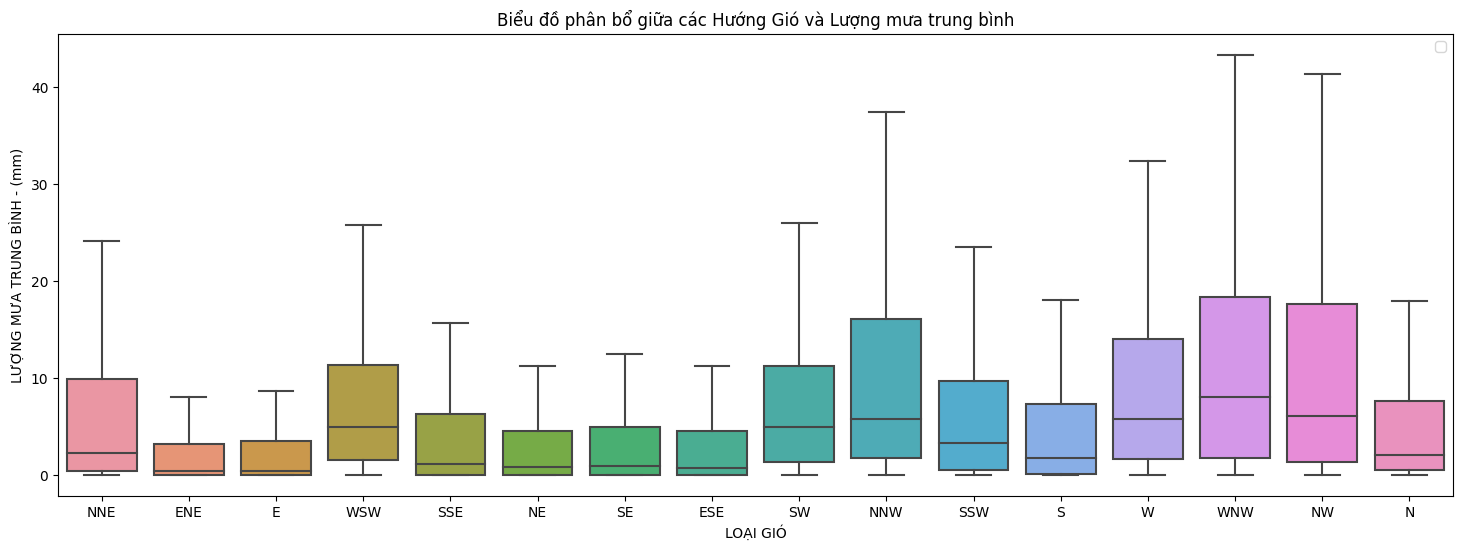

In [8]:
#CÁC LOẠI GIÓ
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
# Dữ liệu
#Tinhthanh = ['Bac Lieu', 'Ho Chi Minh City', 'Tam Ky', 'Ben Tre', 'Hoa Binh', 'Tan An', 'Bien Hoa', 'Hong Gai', 'Thai Nguyen', 'Buon Me Thuot', 'Hue', 'Thanh Hoa', 'Ca Mau', 'Long Xuyen', 'Tra Vinh', 'Cam Pha', 'My Tho', 'Tuy Hoa', 'Cam Ranh', 'Nam Dinh']
#Luong_mua = [6.9, 0, 0, 0, 0, 0, 0.4, 0, 0.5, 0, 4.5, 0, 0, 0, 0.6, 0, 0.5, 11.5, 2.5, 0]
#Huong_gio = ['NNE', 'ENE', 'E', 'E', 'ENE', 'ENE', 'ENE', 'ENE', 'ENE', 'E', 'WSW', 'ENE', 'WSW', 'ENE', 'E', 'E', 'E', 'SSE', 'E', 'ENE']
print(df)
print(df.describe())
data = pd.DataFrame({'Tinhthanh': df['Tinhthanh'], 'Luong_mua': df['Luong_mua'], 'Huong_gio': df['Huong_gio']})

plt.figure(figsize=(18, 6))
sns.boxplot(data=data, x='Huong_gio', y='Luong_mua',showfliers=False)

plt.legend()
plt.xlabel('LOẠI GIÓ')
plt.ylabel('LƯỢNG MƯA TRUNG BÌNH - (mm)')
plt.title('Biểu đồ phân bổ giữa các Hướng Gió và Lượng mưa trung bình')
plt.show()


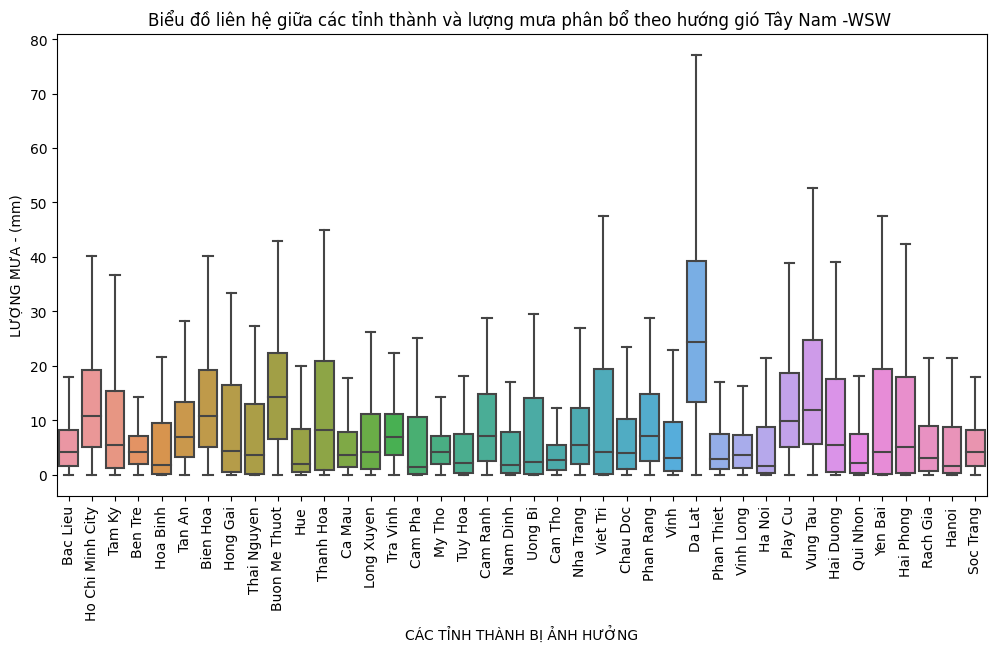

In [10]:
#CÁC TỈNH BỊ TRÚNG GIÓ TÂY NAM
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
data = pd.DataFrame({'Tinhthanh': df['Tinhthanh'], 'Luong_mua': df['Luong_mua'], 'Huong_gio': df['Huong_gio']})
data_ene = data[data['Huong_gio'] == 'WSW']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tinhthanh', y='Luong_mua', data=data_ene, showfliers=False)
plt.xlabel('CÁC TỈNH THÀNH BỊ ẢNH HƯỞNG')
plt.ylabel('LƯỢNG MƯA - (mm)')
plt.title("Biểu đồ liên hệ giữa các tỉnh thành và lượng mưa phân bổ theo hướng gió Tây Nam -WSW ")
plt.xticks(rotation=90)
plt.show()


12345       Tam Ky
81280      Tuy Hoa
158697    Qui Nhon
72019      Cam Pha
94728      Uong Bi
Name: Tinhthanh, dtype: object


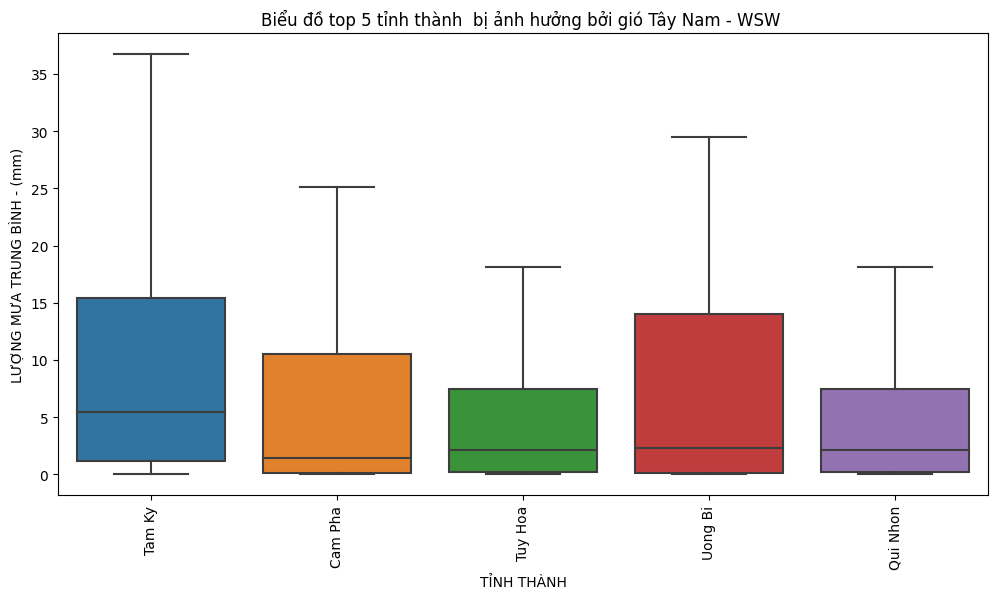

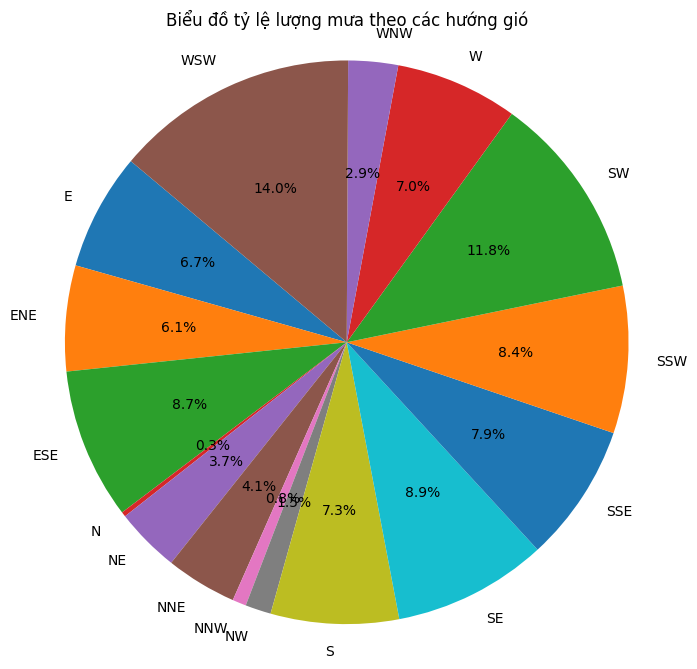

In [12]:
#TOP 5 TỈNH BỊ TRÚNG GIÓ ĐỘC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]

data = pd.DataFrame({'Tinhthanh': df['Tinhthanh'], 'Luong_mua': df['Luong_mua'], 'Huong_gio': df['Huong_gio']})
data_ene = data[data['Huong_gio'] == 'WSW']
top_5_tinhthanh = data_ene.nlargest(5, 'Luong_mua')['Tinhthanh']
print(top_5_tinhthanh)
data_top_5_tinhthanh = data_ene[data_ene['Tinhthanh'].isin(top_5_tinhthanh)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tinhthanh', y='Luong_mua', data=data_top_5_tinhthanh, showfliers=False)
plt.xlabel('TỈNH THÀNH')
plt.ylabel('LƯỢNG MƯA TRUNG BÌNH - (mm)')
plt.title("Biểu đồ top 5 tỉnh thành  bị ảnh hưởng bởi gió Tây Nam - WSW ")
plt.xticks(rotation=90)
plt.show()


luong_mua_by_huong_gio = data.groupby('Huong_gio')['Luong_mua'].sum()

plt.figure(figsize=(8, 8))
plt.pie(luong_mua_by_huong_gio, labels=luong_mua_by_huong_gio.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Biểu đồ tỷ lệ lượng mưa theo các hướng gió')
plt.show()


# CÁC MÔ HÌNH DỰ ĐOÁN VÀ PHÂN TÍCH

        Tinhthanh  Luong_mua Huong_gio  Tocdo_gio        date    Month
0        Bac Lieu        6.9       NNE         17    1/1/2009  2009-01
1        Bac Lieu        0.0       ENE         20    1/1/2010  2010-01
2        Bac Lieu        0.0         E         14    1/1/2011  2011-01
3        Bac Lieu        0.0         E         30    1/1/2012  2012-01
4        Bac Lieu        0.0       ENE         20    1/1/2013  2013-01
...           ...        ...       ...        ...         ...      ...
181955  Soc Trang        0.0       SSW          8  12/28/2016  2016-12
181956  Soc Trang        7.2       ENE         21  12/28/2017  2017-12
181957  Soc Trang        1.3       ENE          9  12/28/2018  2018-12
181958  Soc Trang        0.0         E         11  12/28/2019  2019-12
181959  Soc Trang        0.7       ESE          9  12/28/2020  2020-12

[181960 rows x 6 columns]
        Tinhthanh  Luong_mua Huong_gio        date
10       Bac Lieu        4.5       WSW    1/1/2019
12       Bac Lieu  

<ipython-input-14-5a14a16aa3e9>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_luong_mua_by_month = data.groupby(['Year', 'Month']).mean()['Luong_mua']


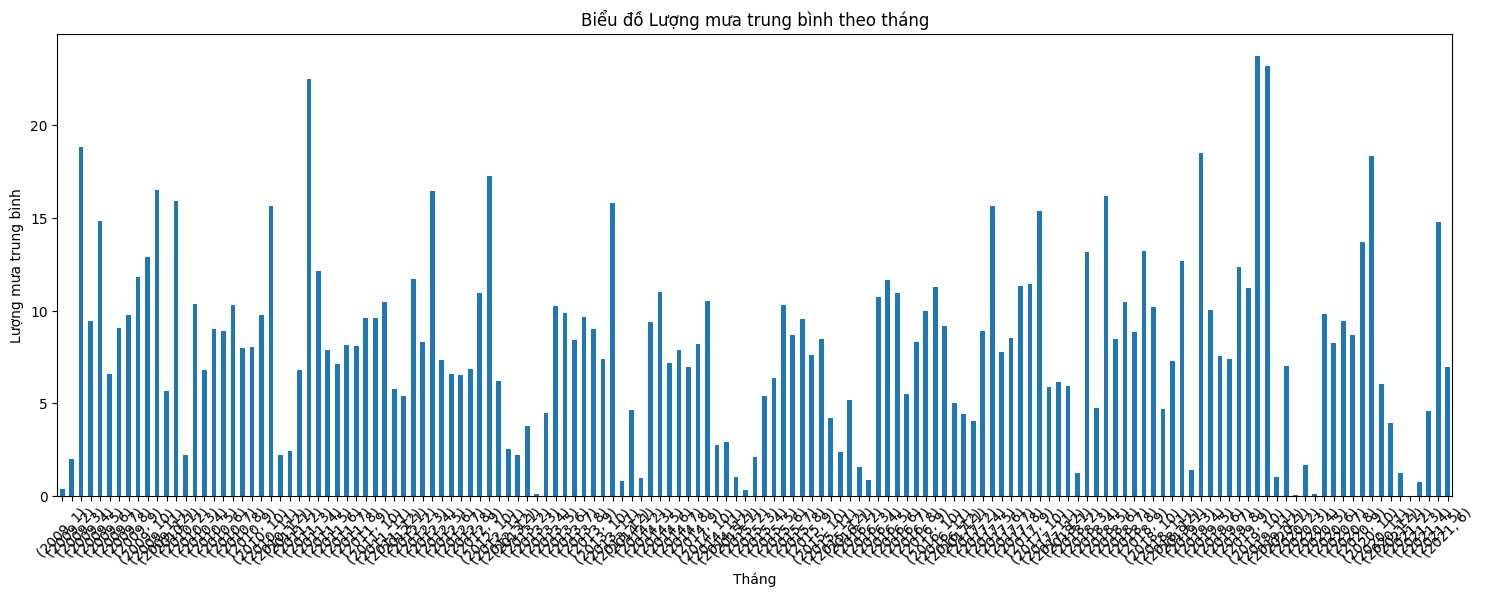

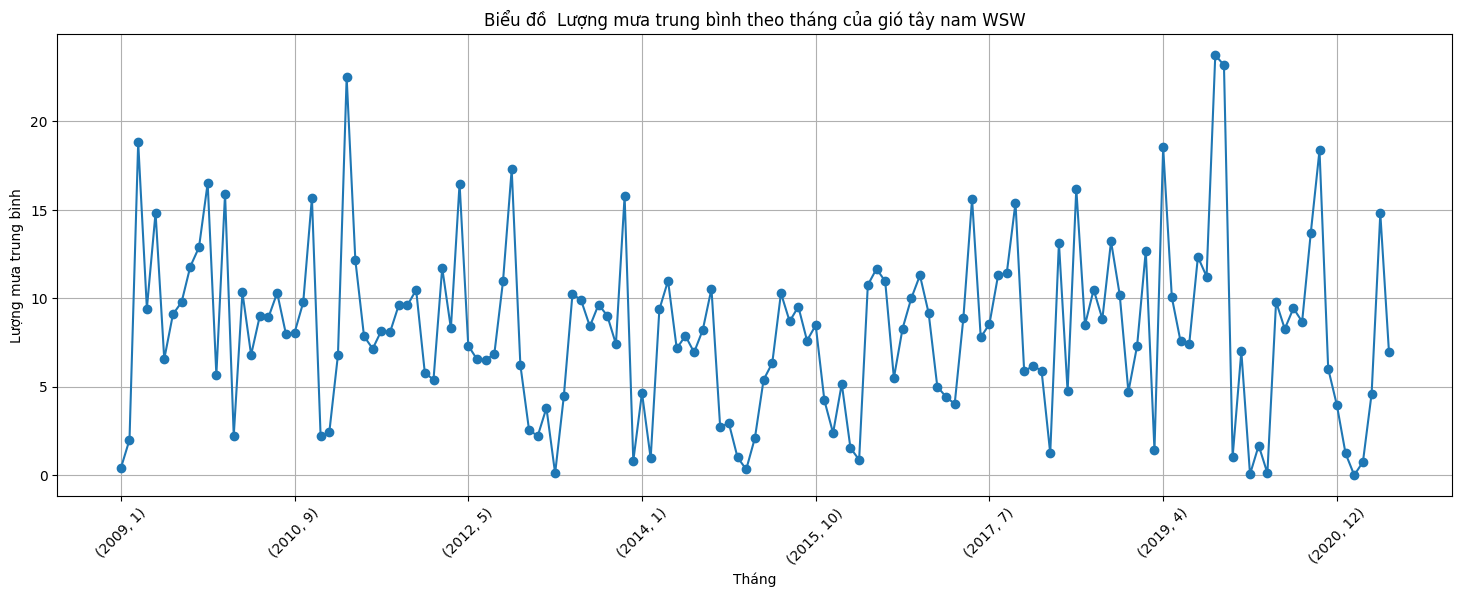

In [14]:
# THỐNG KÊ THEO NGÀY THÁNG NĂM
import pandas as pd
import matplotlib.pyplot as plt

df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
print(df)
df_tn = pd.DataFrame({'Tinhthanh': df['Tinhthanh'], 'Luong_mua': df['Luong_mua'], 'Huong_gio': df['Huong_gio'], 'date': df['date']})
data = df_tn.loc[df.Huong_gio=='WSW',['Tinhthanh', 'Luong_mua', 'Huong_gio', 'date']]
print(data)
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year
avg_luong_mua_by_month = data.groupby(['Year', 'Month']).mean()['Luong_mua']

plt.figure(figsize=(18, 6))
avg_luong_mua_by_month.plot(kind='bar')
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa trung bình')
plt.title('Biểu đồ Lượng mưa trung bình theo tháng')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(18, 6))
avg_luong_mua_by_month.plot(kind='line', marker='o')
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa trung bình')
plt.title('Biểu đồ  Lượng mưa trung bình theo tháng của gió tây nam WSW')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Các thành phố bị ảnh hưởng lớn bởi loại gió 'WSW': ['Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 'Bac Lieu', 

<ipython-input-16-1397daade414>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wsw['date'] = pd.to_datetime(df_wsw['date'])
<ipython-input-16-1397daade414>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wsw['Tháng'] = df_wsw['date'].dt.month


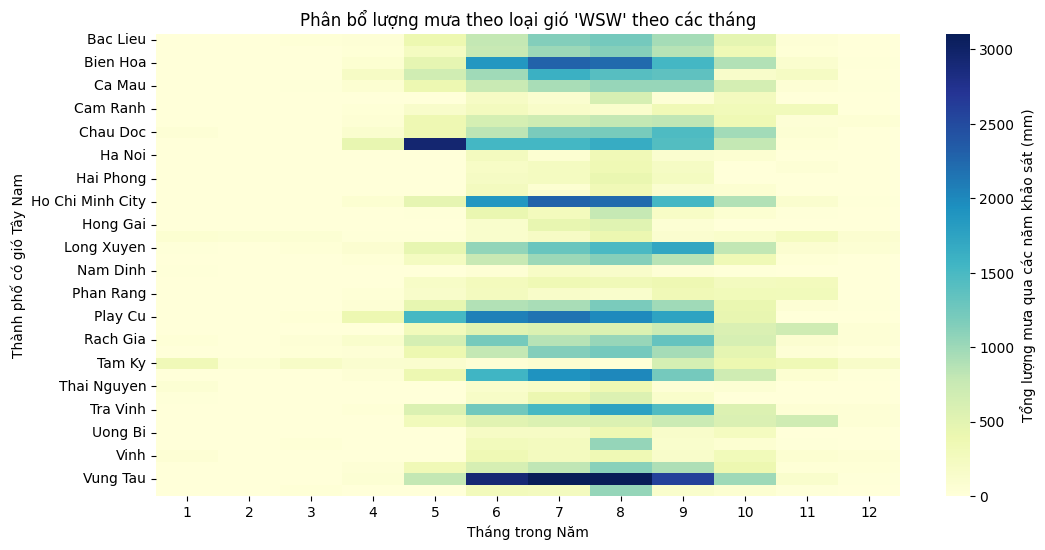

In [16]:
#THÔNG KÊ THEO MẬT ĐỘ TRONG THÁNG
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor


df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
df_tn = pd.DataFrame({'Tinhthanh': df['Tinhthanh'], 'Luong_mua': df['Luong_mua'], 'Huong_gio': df['Huong_gio'], 'date': df['date']})
data = df_tn.loc[df.Huong_gio=='WSW',['Tinhthanh', 'Luong_mua', 'Huong_gio', 'date']]
df = pd.DataFrame(data)

df_wsw = df[(df['Huong_gio'] == 'WSW') & (df['Luong_mua'] != 0)]

cities_affected_by_wsw = df_wsw['Tinhthanh'].tolist()
print("Các thành phố bị ảnh hưởng lớn bởi loại gió 'WSW':", cities_affected_by_wsw)

df_wsw['date'] = pd.to_datetime(df_wsw['date'])
df_wsw['Tháng'] = df_wsw['date'].dt.month

pivot_table_wsw = df_wsw.pivot_table(index='Tinhthanh', columns='Tháng', values='Luong_mua', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
plt.title("Phân bổ lượng mưa theo loại gió 'WSW' theo các tháng")
sns.heatmap(pivot_table_wsw, annot=False, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'Tổng lượng mưa qua các năm khảo sát (mm)'})
plt.xlabel('Tháng trong Năm')
plt.ylabel('Thành phố có gió Tây Nam')
plt.show()


In [18]:
#CHẠY LẠI DATASET CÓ GIÓ ĐỘC TÂY NAM
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Concatenate


df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
df_tn = pd.DataFrame({'Thành phố': df['Tinhthanh'], 'Lượng mưa': df['Luong_mua'], 'Loại gió': df['Huong_gio'], 'Thời gian lấy mẫu': df['date']})
data = df_tn.loc[df.Huong_gio=='WSW',['Thành phố', 'Lượng mưa', 'Loại gió', 'Thời gian lấy mẫu']]
df = pd.DataFrame(data)


label_encoder_city = LabelEncoder()
df['Thành phố'] = label_encoder_city.fit_transform(df['Thành phố'])

label_encoder_wind = LabelEncoder()
df['Loại gió'] = label_encoder_wind.fit_transform(df['Loại gió'])


df['Thời gian lấy mẫu'] = pd.to_datetime(df['Thời gian lấy mẫu'], format='%m/%d/%Y')


df['Tháng'] = df['Thời gian lấy mẫu'].dt.month
df['Ngày'] = df['Thời gian lấy mẫu'].dt.day
df['Năm'] = df['Thời gian lấy mẫu'].dt.year

scaler = StandardScaler()
df['Lượng mưa'] = scaler.fit_transform(df['Lượng mưa'].values.reshape(-1, 1))

X = df[['Thành phố', 'Loại gió', 'Tháng', 'Ngày', 'Năm']].values
y = df['Lượng mưa'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test), verbose=0)

loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Đánh giá trên tập kiểm tra - Loss: {loss:.4f}')


Đánh giá trên tập kiểm tra - Loss: 1.2998


MSE của mô hình ARIMA: 1.3025213584156627


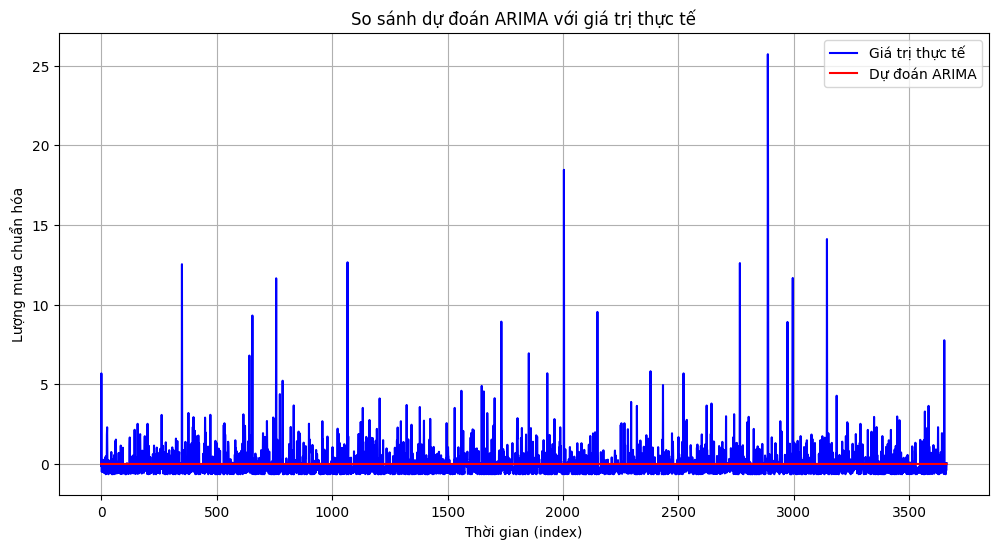

In [20]:
#MÔ HÌNH ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import prophet
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
df_tn = pd.DataFrame({'Thành phố': df['Tinhthanh'], 'Lượng mưa': df['Luong_mua'], 'Loại gió': df['Huong_gio'], 'Thời gian lấy mẫu': df['date']})
data = df_tn.loc[df.Huong_gio=='WSW',['Thành phố', 'Lượng mưa', 'Loại gió', 'Thời gian lấy mẫu']]
df = pd.DataFrame(data)


model_arima = ARIMA(y_train, order=(1, 1, 1))
model_arima_fit = model_arima.fit()
y_arima_pred = model_arima_fit.forecast(len(y_test))

mse_arima = mean_squared_error(y_test, y_arima_pred)
print(f'MSE của mô hình ARIMA: {mse_arima}')

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='blue')
plt.plot(y_arima_pred, label='Dự đoán ARIMA', color='red')
plt.title('So sánh dự đoán ARIMA với giá trị thực tế')
plt.xlabel('Thời gian (index)')
plt.ylabel('Lượng mưa chuẩn hóa')
plt.legend()
plt.grid(True)
plt.show()


MSE của mô hình SAMIRA: 1.302600334530889


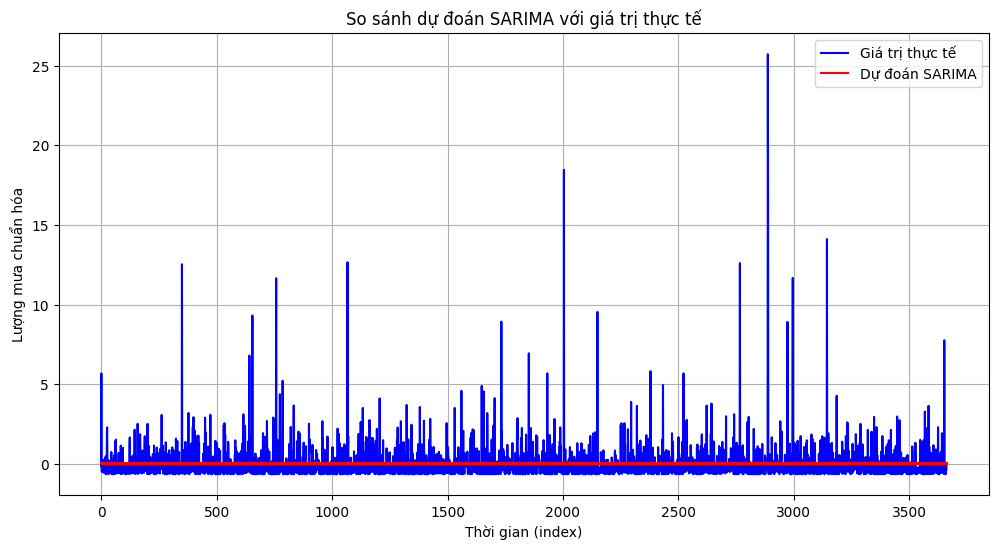

In [21]:
# 2. Mô hình SARIMA
model_sarima = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
y_sarima_pred = model_sarima_fit.forecast(len(y_test))

mse_sarima = mean_squared_error(y_test, y_sarima_pred)
print(f'MSE của mô hình SAMIRA: {mse_sarima}')

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='blue')
plt.plot(y_sarima_pred, label='Dự đoán SARIMA', color='red')
plt.title('So sánh dự đoán SARIMA với giá trị thực tế')
plt.xlabel('Thời gian (index)')
plt.ylabel('Lượng mưa chuẩn hóa')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/2
1831/1831 [==============================] - 6s 3ms/step - loss: 149.9481 - val_loss: 1.3790
Epoch 2/2
115/115 [==============================] - 1s 2ms/step
MSE của mô hình LSTM: 1.402084760374146


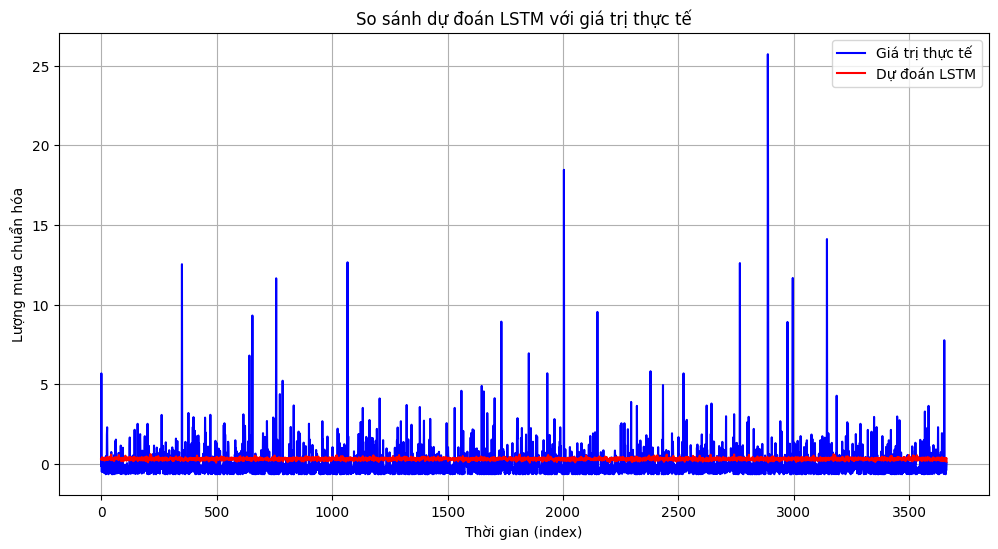

In [23]:
#MÔ HÌNH LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
df_tn = pd.DataFrame({'Thành phố': df['Tinhthanh'], 'Lượng mưa': df['Luong_mua'], 'Loại gió': df['Huong_gio'], 'Thời gian lấy mẫu': df['date']})
data = df_tn.loc[df.Huong_gio=='WSW',['Thành phố', 'Lượng mưa', 'Loại gió', 'Thời gian lấy mẫu']]
df = pd.DataFrame(data)


def prepare_data(df):
    label_encoder_city = LabelEncoder()
    df['Thành phố'] = label_encoder_city.fit_transform(df['Thành phố'])

    label_encoder_wind = LabelEncoder()
    df['Loại gió'] = label_encoder_wind.fit_transform(df['Loại gió'])

    df['Thời gian lấy mẫu'] = pd.to_datetime(df['Thời gian lấy mẫu'], format='%m/%d/%Y')

    df['Tháng'] = df['Thời gian lấy mẫu'].dt.month
    df['Ngày'] = df['Thời gian lấy mẫu'].dt.day
    df['Năm'] = df['Thời gian lấy mẫu'].dt.year

    scaler = StandardScaler()
    df['Lượng mưa'] = scaler.fit_transform(df['Lượng mưa'].values.reshape(-1, 1))

    X = df[['Thành phố', 'Loại gió', 'Tháng', 'Ngày', 'Năm']].values
    y = df['Lượng mưa'].values

    return X, y

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_lstm_model(X_train, y_train, X_test, y_test, epochs=2, batch_size=8):
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = build_lstm_model(input_shape=(1, X_train.shape[1]))
    history = model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_lstm, y_test), verbose=1)

    return model, history

X, y = prepare_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lstm, history_lstm = train_lstm_model(X_train, y_train, X_test, y_test, epochs=2, batch_size=8)

y_lstm_pred = model_lstm.predict(X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))).flatten()

mse_lstm = mean_squared_error(y_test, y_lstm_pred)
print(f'MSE của mô hình LSTM: {mse_lstm}')

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='blue')
plt.plot(y_lstm_pred, label='Dự đoán LSTM', color='red')
plt.title('So sánh dự đoán LSTM với giá trị thực tế')
plt.xlabel('Thời gian (index)')
plt.ylabel('Lượng mưa chuẩn hóa')
plt.legend()
plt.grid(True)
plt.show()


115/115 [==============================] - 0s 2ms/step
Bảng so sánh giữa các mô hình:
  Mô hình       MSE  Thời gian huấn luyện  Thời gian dự đoán
0   ARIMA  1.302537              1.171635           0.137659
1  SARIMA  1.302424              2.744402           0.243141
2    LSTM  1.394229              8.854714           0.497521


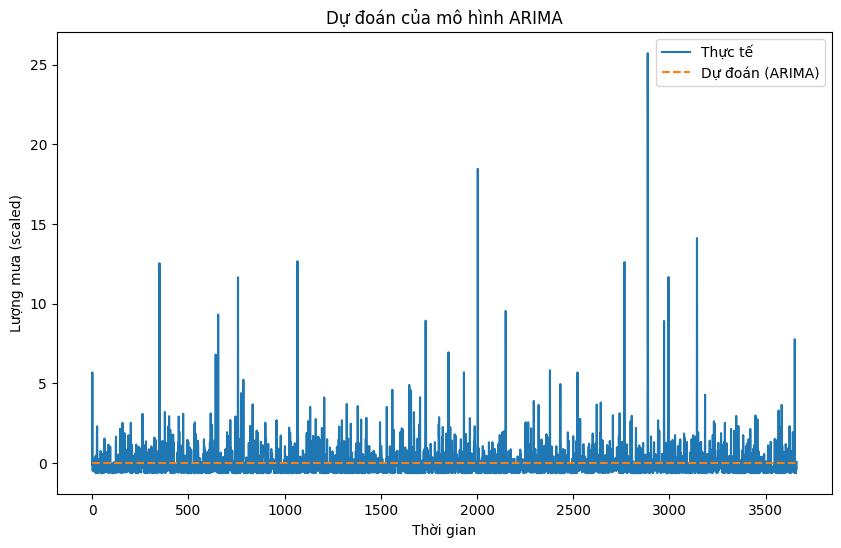

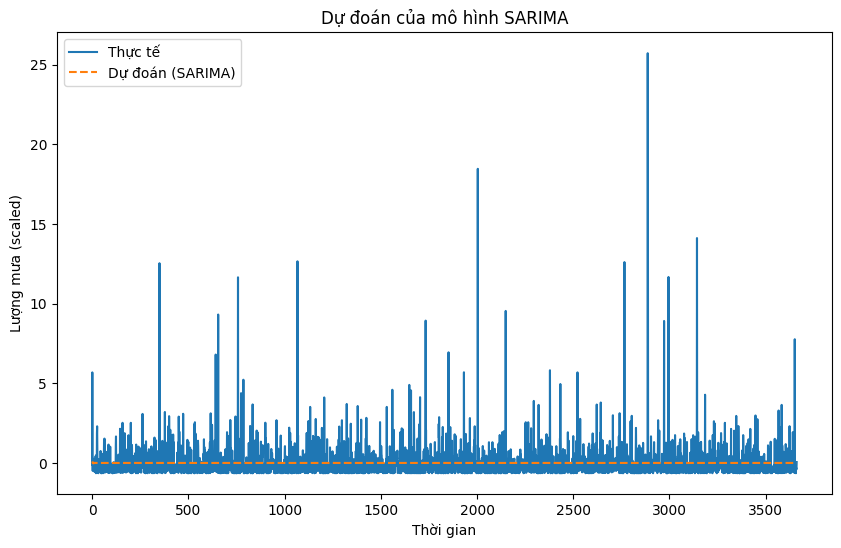

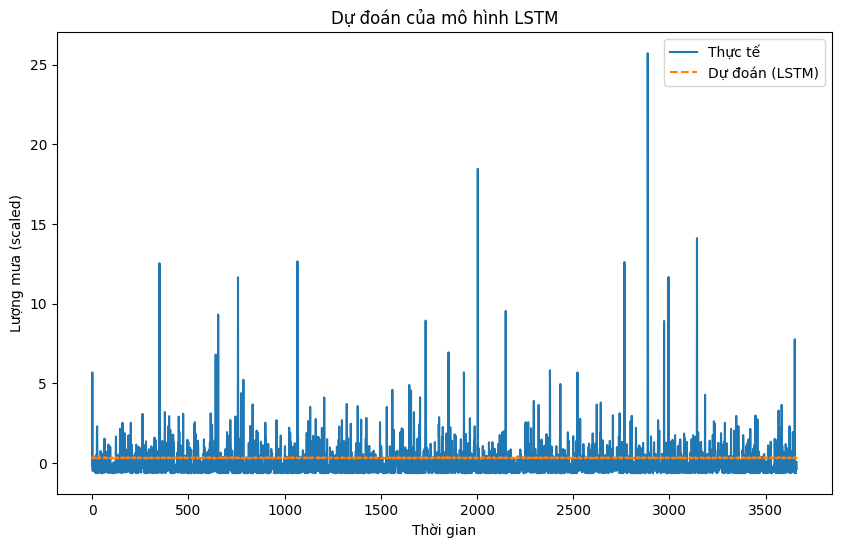

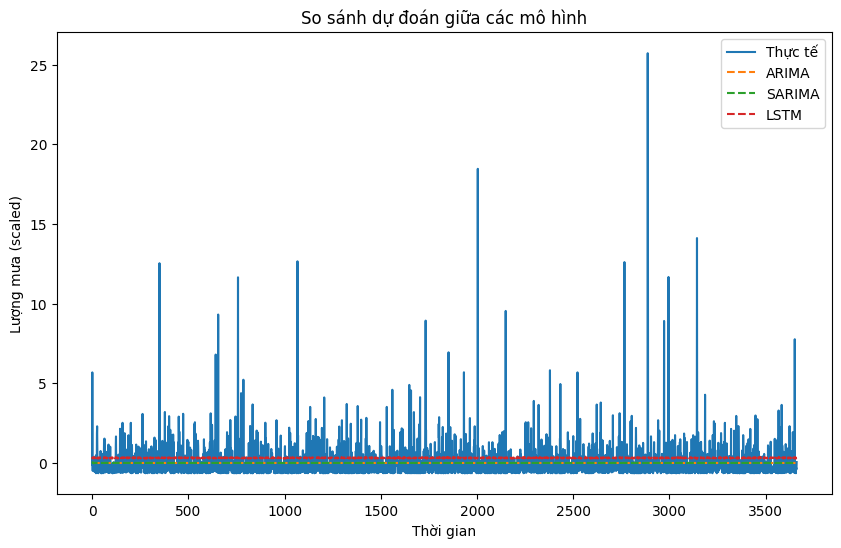

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

df = df_all[['Tinhthanh', 'Luong_mua', 'Huong_gio', 'Tocdo_gio', 'date', 'Month']]
df_tn = pd.DataFrame({'Thành phố': df['Tinhthanh'], 'Lượng mưa': df['Luong_mua'], 'Loại gió': df['Huong_gio'], 'Thời gian lấy mẫu': df['date']})
data = df_tn.loc[df.Huong_gio=='WSW',['Thành phố', 'Lượng mưa', 'Loại gió', 'Thời gian lấy mẫu']]
df = pd.DataFrame(data)

def prepare_data(df):
    label_encoder_city = LabelEncoder()
    df['Thành phố'] = label_encoder_city.fit_transform(df['Thành phố'])

    label_encoder_wind = LabelEncoder()
    df['Loại gió'] = label_encoder_wind.fit_transform(df['Loại gió'])

    df['Thời gian lấy mẫu'] = pd.to_datetime(df['Thời gian lấy mẫu'], format='%M/%d/%Y')

    df['Tháng'] = df['Thời gian lấy mẫu'].dt.month
    df['Ngày'] = df['Thời gian lấy mẫu'].dt.day
    df['Năm'] = df['Thời gian lấy mẫu'].dt.year

    scaler = StandardScaler()
    df['Lượng mưa'] = scaler.fit_transform(df['Lượng mưa'].values.reshape(-1, 1))

    X = df[['Thành phố', 'Loại gió', 'Tháng', 'Ngày', 'Năm']].values
    y = df['Lượng mưa'].values

    return X, y

def train_arima_model(y_train):
    start_time = time.time()
    model_arima = ARIMA(y_train, order=(1, 0, 0))
    model_arima_fit = model_arima.fit()
    end_time = time.time()
    training_time = end_time - start_time
    return model_arima_fit, training_time

def predict_arima_model(model, X_test):
    start_time = time.time()
    y_arima_pred = model.forecast(steps=len(X_test))
    end_time = time.time()
    prediction_time = end_time - start_time
    return y_arima_pred, prediction_time

def train_sarima_model(y_train):
    start_time = time.time()
    model_sarima = SARIMAX(y_train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
    model_sarima_fit = model_sarima.fit()
    end_time = time.time()
    training_time = end_time - start_time
    return model_sarima_fit, training_time

def predict_sarima_model(model, X_test):
    start_time = time.time()
    y_sarima_pred = model.forecast(steps=len(X_test))
    end_time = time.time()
    prediction_time = end_time - start_time
    return y_sarima_pred, prediction_time

def train_lstm_model(X_train, y_train, epochs=2, batch_size=8):
    start_time = time.time()
    model_lstm = Sequential()
    model_lstm.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[1])))
    model_lstm.add(Dense(1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    model_lstm.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    return model_lstm, training_time

def predict_lstm_model(model, X_test):
    start_time = time.time()
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    y_lstm_pred = model.predict(X_test_lstm).flatten()
    end_time = time.time()
    prediction_time = end_time - start_time
    return y_lstm_pred, prediction_time

X, y = prepare_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_arima_fit, arima_training_time = train_arima_model(y_train)
y_arima_pred, arima_prediction_time = predict_arima_model(model_arima_fit, X_test)

model_sarima_fit, sarima_training_time = train_sarima_model(y_train)
y_sarima_pred, sarima_prediction_time = predict_sarima_model(model_sarima_fit, X_test)

model_lstm, lstm_training_time = train_lstm_model(X_train, y_train)
y_lstm_pred, lstm_prediction_time = predict_lstm_model(model_lstm, X_test)

mse_arima = mean_squared_error(y_test, y_arima_pred)
mse_sarima = mean_squared_error(y_test, y_sarima_pred)
mse_lstm = mean_squared_error(y_test, y_lstm_pred)

model_names = ['ARIMA', 'SARIMA', 'LSTM']
mse_values = [mse_arima, mse_sarima, mse_lstm]
training_times = [arima_training_time, sarima_training_time, lstm_training_time]
prediction_times = [arima_prediction_time, sarima_prediction_time, lstm_prediction_time]

comparison_df = pd.DataFrame({
    'Mô hình': model_names,
    'MSE': mse_values,
    'Thời gian huấn luyện': training_times,
    'Thời gian dự đoán': prediction_times
})

print("Bảng so sánh giữa các mô hình:")
print(comparison_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế')
plt.plot(y_arima_pred, label='Dự đoán (ARIMA)', linestyle='dashed')
plt.xlabel('Thời gian')
plt.ylabel('Lượng mưa (scaled)')
plt.title('Dự đoán của mô hình ARIMA')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế')
plt.plot(y_sarima_pred, label='Dự đoán (SARIMA)', linestyle='dashed')
plt.xlabel('Thời gian')
plt.ylabel('Lượng mưa (scaled)')
plt.title('Dự đoán của mô hình SARIMA')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế')
plt.plot(y_lstm_pred, label='Dự đoán (LSTM)', linestyle='dashed')
plt.xlabel('Thời gian')
plt.ylabel('Lượng mưa (scaled)')
plt.title('Dự đoán của mô hình LSTM')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Thực tế')
plt.plot(y_arima_pred, label='ARIMA', linestyle='dashed')
plt.plot(y_sarima_pred, label='SARIMA', linestyle='dashed')
plt.plot(y_lstm_pred, label='LSTM', linestyle='dashed')
plt.xlabel('Thời gian')
plt.ylabel('Lượng mưa (scaled)')
plt.title('So sánh dự đoán giữa các mô hình')
plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuẩn bị dữ liệu cho biểu đồ hộp
data_boxplot = [df[df['Thành phố'] == city]['Lượng mưa'] for city in df['Thành phố'].unique()]

# Biểu đồ hộp
plt.figure(figsize=(10, 6))
plt.boxplot(data_boxplot, labels=df['Thành phố'].unique())
plt.xlabel('Thành phố')
plt.ylabel('Lượng mưa (mm)')
plt.title('Biểu đồ hộp của lượng mưa theo thành phố')
plt.xticks(rotation=45)
plt.show()

# Biểu đồ tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Biểu đồ tương quan giữa các yếu tố thời tiết')
plt.show()

# Biểu đồ cột thời tiết
df['Thời gian lấy mẫu'] = pd.to_datetime(df['Thời gian lấy mẫu'])
df['Tháng'] = df['Thời gian lấy mẫu'].dt.month
monthly_rain = df.groupby('Tháng')['Lượng mưa'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_rain.index, monthly_rain)
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa trung bình (mm)')
plt.title('Biểu đồ cột lượng mưa theo tháng')
plt.xticks(rotation=45)
plt.show()

# Biểu đồ radar
factors = ['Lượng mưa', 'Loại gió', 'Tháng']
for city in df['Thành phố'].unique():
    plt.figure(figsize=(8, 6))
    radar_data = df[df['Thành phố'] == city][factors].mean().values
    plt.polar(np.linspace(0, 2 * np.pi, len(radar_data), endpoint=False), radar_data)
    lines, labels = plt.thetagrids(np.degrees(np.linspace(0, 2 * np.pi, len(radar_data), endpoint=False)), factors)
    plt.fill(np.linspace(0, 2 * np.pi, len(radar_data), endpoint=False), radar_data, alpha=0.25)
    plt.title(f'Biểu đồ radar yếu tố thời tiết - Thành phố {city}')
    plt.show()
